<a href="https://colab.research.google.com/github/nireasir/auth-dws-ml2526/blob/main/MLex7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,precision_recall_fscore_support
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Ερώτημα 1

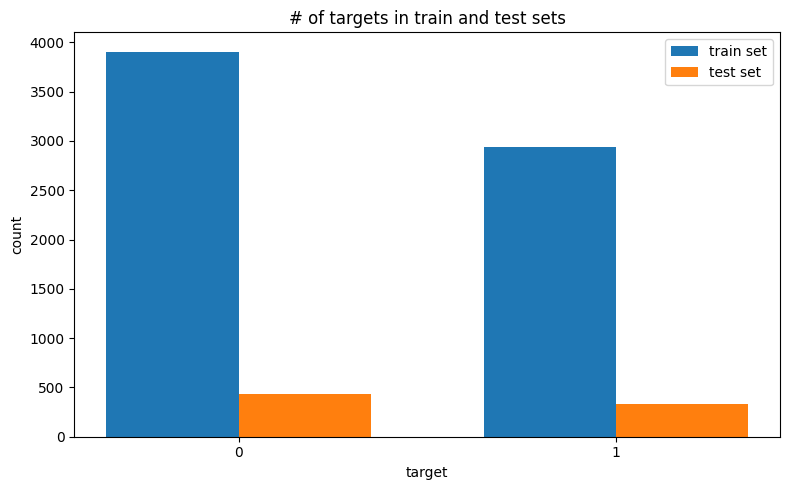

In [ ]:
df=pd.read_csv("train.csv")
x=df.drop(columns=['target'])
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=0,stratify=y)
train_counts=y_train.value_counts().sort_index()
test_counts=y_test.value_counts().sort_index()
labels = train_counts.index.astype(str)
x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_counts.values, width=width, label="train set")
plt.bar(x + width/2, test_counts.values,  width=width, label="test set")
plt.xticks(x,labels)
plt.xlabel("target")
plt.ylabel("count")
plt.title("# of targets in train and test sets")
plt.legend()
plt.tight_layout()
plt.show()

Παρατηρούμε ότι το test set είναι αρκετά ισορροπημένο. Το train set δεν είναι τελείως ισορροπημένο, αλλά ούτε και τελείως ανισόρροπο.

# Ερώτημα 2

In [ ]:
x_train.drop(columns=['id','location'])
x_train=x_train[['keyword','text']].fillna('null')
x_train['inputs']=x_train['keyword']+''+x_train['text']
x_test.drop(columns=['id','location'])
x_test=x_test[['keyword','text']].fillna('null')
x_test['inputs']=x_test['keyword']+''+x_test['text']

# Ερώτημα 3

In [ ]:
from techniques import(removeUnicode,replaceURL,replaceAtUser,removeHashtagInFrontOfWord,removeNumbers,replaceMultiExclamationMark,
    replaceMultiQuestionMark,replaceMultiStopMark,removeEmoticons,)
def clean_tweet(text):
    text = removeUnicode(text)
    text = replaceURL(text)
    text = replaceAtUser(text)
    text = removeHashtagInFrontOfWord(text)
    text = removeNumbers(text)
    text = replaceMultiExclamationMark(text)
    text = replaceMultiQuestionMark(text)
    text = replaceMultiStopMark(text)
    text = removeEmoticons(text)
    return text
x_train['inputs'] = x_train['inputs'].apply(clean_tweet)
x_test['inputs'] = x_test['inputs'].apply(clean_tweet)

1.   removeUnicode που αφαιρεί strings όπως "\u002c", δηλαδή άχρηστα strings που δε βοηθάνε το μοντέλο.
2.   replaceURL που αντικαθιστα κανονικά url με το string url για να ξέρουμε απλά ότι υπάρχει url και να μην έχουμε το κανονικό url ως περιττή πληροφορία.
1.   replaceAtUser που αντικαθιστά τα usernames των χρηστών με το string username για να μην έχουμε τα usernames των χρηστών ως περιττή πληροφορία
2.   replaceHashtagInFrontOfWord που αφαιρεί τα hastags μπροστά από τις λέξεις γιατί τα hastags είναι θόρυβος
1.   removeNumbers γιατί θεωρούνται θόρυβος
2.   Οι επόμενες 3 συναρτήσεις αντικαθιστούν πολλαπλά !,? και . με ειδικά tokens τα οποία αφαιρούν τον θόρυβο των συμβόλων αυτών αλλά κρατάνε την ένταση του κειμένου.
1.  removeEmoticons που αφαιρεί τα emoji και άλλα αντίστοιχα σύμβολα καθώς δεν μπορεί να τα επεξεργαστεί εύκολα ένα μοντέλο κειμένου.










# Ερώτημα 4

In [ ]:
train_inputs = x_train['inputs'].to_numpy()
test_inputs = x_test['inputs'].to_numpy()
train_targets = y_train.to_numpy()
test_targets = y_test.to_numpy()

# Ερώτημα 5

In [ ]:
tfidf=TfidfVectorizer()
x_train_tfidf=tfidf.fit_transform(train_inputs)
x_test_tfidf=tfidf.transform(test_inputs)

# Ερώτημα 6

In [ ]:
svm_clf = LinearSVC(random_state=0)
svm_clf.fit(x_train_tfidf, y_train)
y_pred_train = svm_clf.predict(x_train_tfidf)
accuracy  = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall  = recall_score(y_train, y_pred_train)
f1   = f1_score(y_train, y_pred_train)
print(f"accuracy in train set : {accuracy:.2f}")
print(f"precision in train set: {precision:.2f}")
print(f"recall in train set : {recall:.2f}")
print(f"f1-score in train set: {f1:.2f}")
print(f"\n")
y_pred_test = svm_clf.predict(x_test_tfidf)
accuracy  = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall  = recall_score(y_test, y_pred_test)
f1   = f1_score(y_test, y_pred_test)
print(f"accuracy in test set : {accuracy:.2f}")
print(f"precision in test set: {precision:.2f}")
print(f"recall in test set : {recall:.2f}")
print(f"f1-score in test set: {f1:.2f}")

accuracy in train set : 0.98
precision in train set: 0.99
recall in train set : 0.96
f1-score in train set: 0.97


accuracy in test set : 0.80
precision in test set: 0.78
recall in test set : 0.73
f1-score in test set: 0.75


Η πιο σημαντική μετρική είναι το recall, καθώς μας ενδιαφέρει να χάνουμε τα δείγματα στα οποία το target είναι 1 (δηλαδή ότι υπάρχει φυσική καταστροφή), γιατί αλλιώς μπορεί να κινδυνεύσουν ζωές ανθρώπων.

# Ερώτημα 7

In [ ]:
x_train_dense = x_train_tfidf.toarray()
x_test_dense  = x_test_tfidf.toarray()
pca = PCA(n_components=0.95, random_state=0)
x_train_pca = pca.fit_transform(x_train_dense)
x_test_pca  = pca.transform(x_test_dense)


#linearSVC
print("linearSVC")
lin_svc_pca = LinearSVC(random_state=0)
lin_svc_pca.fit(x_train_pca, y_train)
y_pred_linear = lin_svc_pca.predict(x_test_pca)
accuracy  = accuracy_score(y_test, y_pred_linear)
precision = precision_score(y_test, y_pred_linear)
recall  = recall_score(y_test, y_pred_linear)
f1   = f1_score(y_test, y_pred_linear)
print(f"accuracy in test set : {accuracy:.2f}")
print(f"precision in test set: {precision:.2f}")
print(f"recall in test set : {recall:.2f}")
print(f"f1-score in test set: {f1:.2f}")

#SVC with RBF
print("SVC with RBF")
rbf_svc = SVC(kernel='rbf', random_state=0)
rbf_svc.fit(x_train_pca, y_train)
y_pred_rbf = rbf_svc.predict(x_test_pca)
accuracy  = accuracy_score(y_test, y_pred_rbf)
precision = precision_score(y_test, y_pred_rbf)
recall  = recall_score(y_test, y_pred_rbf)
f1   = f1_score(y_test, y_pred_rbf)
print(f"accuracy in test set : {accuracy:.2f}")
print(f"precision in test set: {precision:.2f}")
print(f"recall in test set : {recall:.2f}")
print(f"f1-score in test set: {f1:.2f}")

linearSVC
accuracy in test set : 0.79
precision in test set: 0.76
recall in test set : 0.73
f1-score in test set: 0.75
SVC with RBF
accuracy in test set : 0.78
precision in test set: 0.73
recall in test set : 0.78
f1-score in test set: 0.76


# Ερώτημα 8

                 Model  Accuracy  Precision    Recall  F1-score
0   LinearSVC (No PCA)  0.795276   0.794538  0.795276  0.794347
1      LinearSVC (PCA)  0.787402   0.786659  0.787402  0.786760
2  SVC RBF scale (PCA)  0.783465   0.786037  0.783465  0.784155
3   SVC RBF auto (PCA)  0.570866   0.325888  0.570866  0.414915


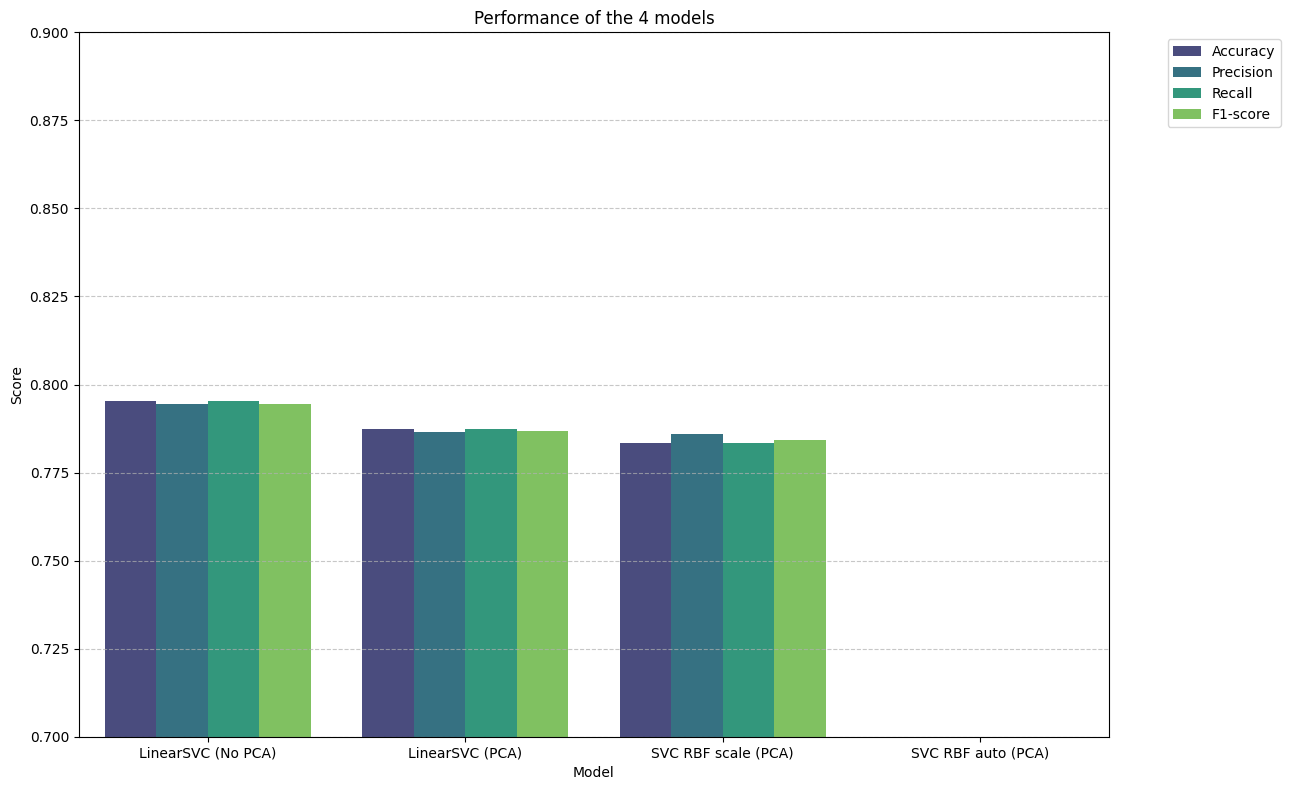

In [ ]:
svc_auto = SVC(kernel='rbf', gamma='auto', random_state=0)
svc_auto.fit(x_train_pca, y_train)
y_pred_auto = svc_auto.predict(x_test_pca)
data=[
    ("LinearSVC (No PCA)", y_pred_test),
    ("LinearSVC (PCA)", y_pred_linear),
    ("SVC RBF scale (PCA)", y_pred_rbf),
    ("SVC RBF auto (PCA)", y_pred_auto)
]
result = []
for name, preds in data:
    acc = accuracy_score(y_test, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted', zero_division=0)
    result.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })
df_result = pd.DataFrame(result)
print(df_result)
df_melted = df_result.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(13, 8))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Performance of the 4 models")
plt.ylim(0.7, 0.9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Ερώτημα 9

In [27]:
x_train_dense_full = x_train_tfidf.toarray()
x_test_dense_full = x_test_tfidf.toarray()
gnb = GaussianNB()
gnb.fit(x_train_dense_full, y_train)
y_pred_gnb = gnb.predict(x_test_dense_full)
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)
print(f"accuracy of gnb:  {accuracy:.2f}")
print(f"precision of gnb: {precision:.2f}")
print(f"recall of gnb:    {recall:.2f}")
print(f"f1 Score of gnb:  {f1:.2f}")

accuracy of gnb:  0.66
precision of gnb: 0.58
recall of gnb:    0.79
f1 Score of gnb:  0.67
